In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import xarray as xr
import os

from collections import defaultdict

from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte

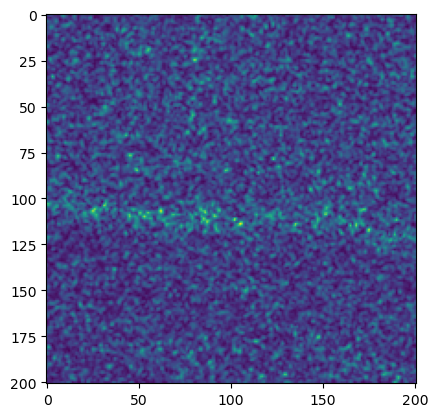

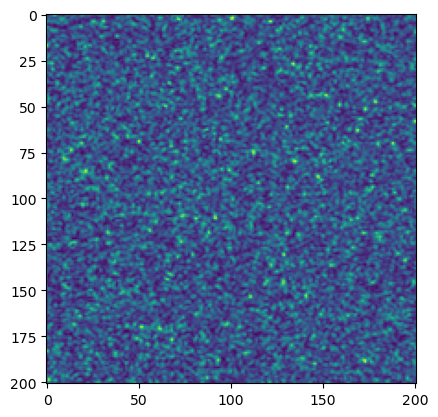

In [2]:
noland_ds = xr.open_dataset('./out/homogenuity/noland/0.nc')
for sigma0 in noland_ds.sigma0.transpose("pol", ...):   
    plt.imshow(sigma0)
    plt.show()

/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


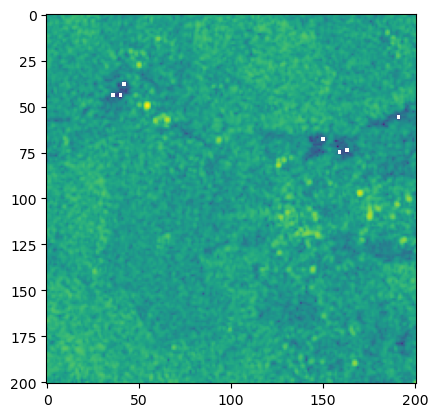

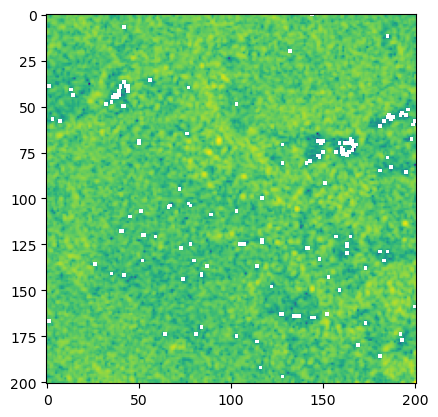

In [3]:
land_ds = xr.open_dataset('./out/homogenuity/land/1.nc')
for sigma0 in land_ds.sigma0.transpose("pol", ...):   
    plt.imshow(10 * np.log10(sigma0))
    plt.show()

In [4]:
land_dir = './out/homogenuity/land/'
land_patches = []

for file_name in os.listdir(land_dir):
    if not file_name.endswith('.nc'): continue
            
    land_ds = xr.open_dataset(land_dir + file_name)
    for sigma0 in land_ds.sigma0.transpose("pol", ...):   
        land_patches.append(sigma0.values)

In [5]:
noland_dir = './out/homogenuity/noland/'
noland_patches = []

for file_name in os.listdir(noland_dir):
    if not file_name.endswith('.nc'): continue
            
    noland_ds = xr.open_dataset(noland_dir + file_name)
    for sigma0 in noland_ds.sigma0.transpose("pol", ...):   
        noland_patches.append(sigma0.values)

/var/folders/_9/vvqgylds56j6qt35q29hhlpm0000gn/T/ipykernel_42056/3387943184.py:2: RuntimeWarning: invalid value encountered in log10
  plt.imshow(10 * np.log10(img))


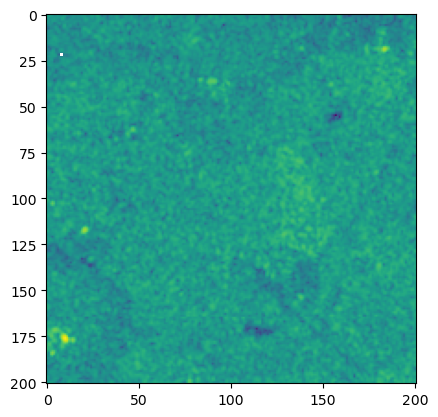

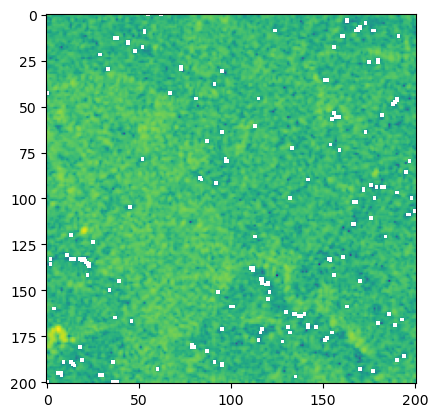

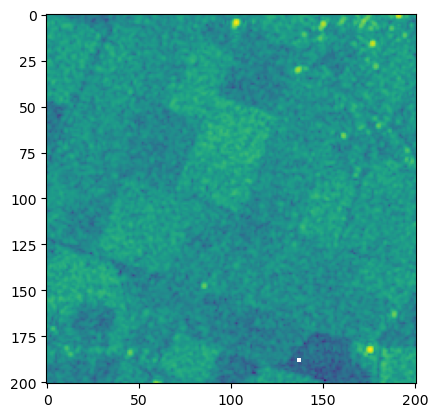

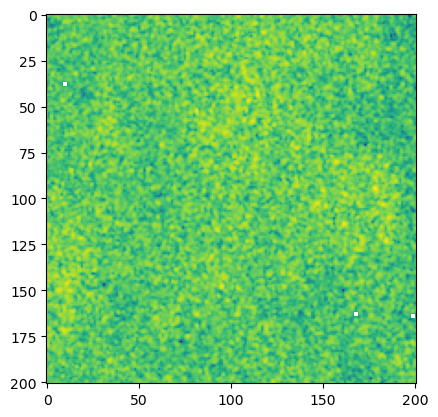

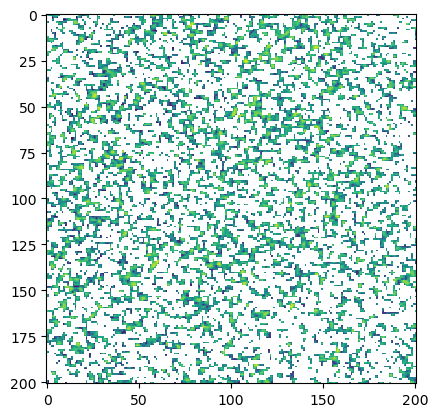

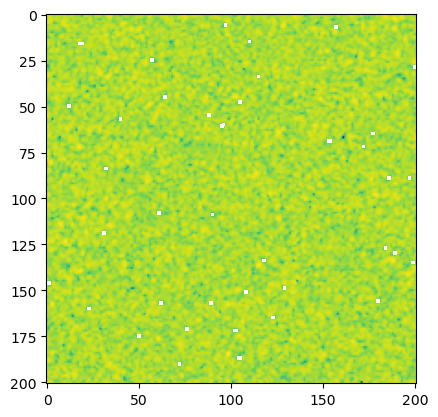

In [6]:
for img in (land_patches[:3] + noland_patches[:3]):
    plt.imshow(10 * np.log10(img))
    plt.show()

/var/folders/_9/vvqgylds56j6qt35q29hhlpm0000gn/T/ipykernel_27449/143220709.py:3: RuntimeWarning: divide by zero encountered in log10
  10 * np.log10(


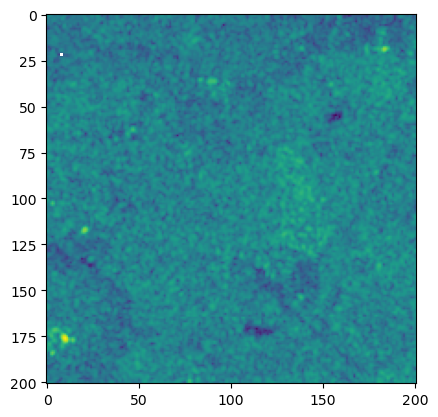

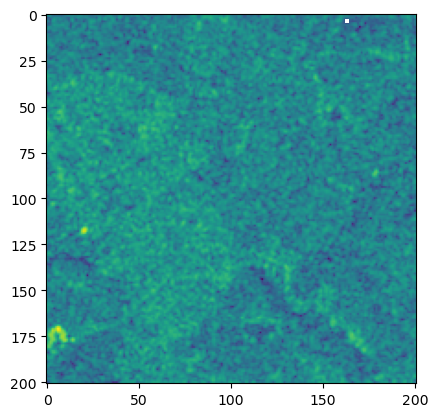

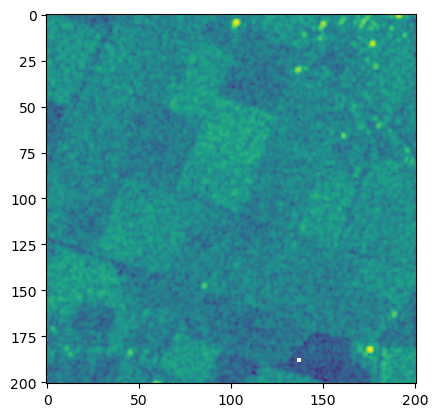

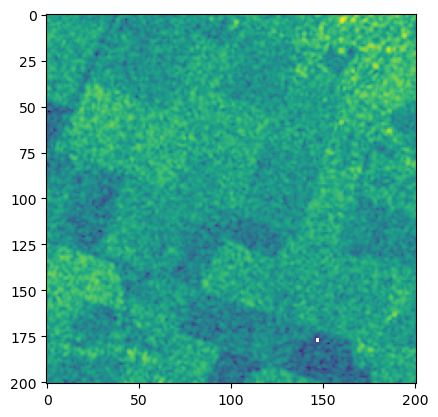

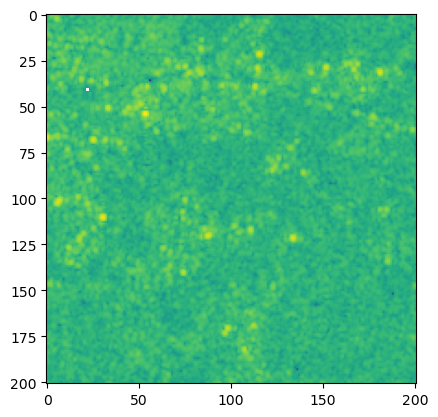

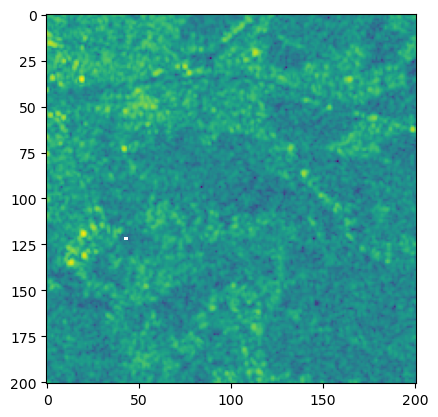

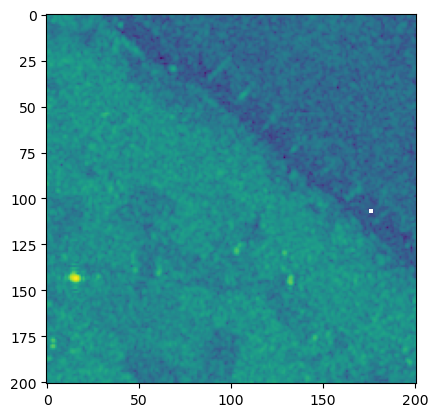

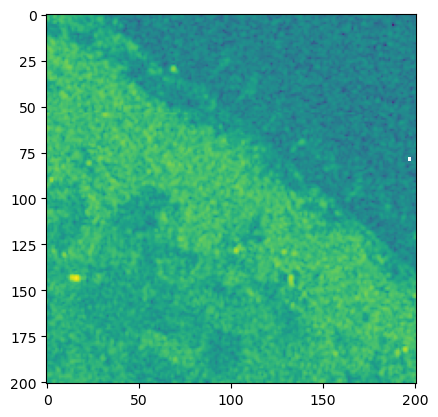

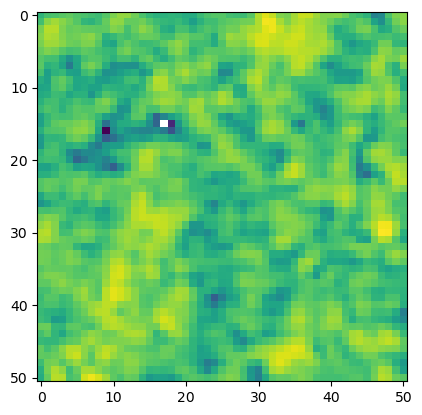

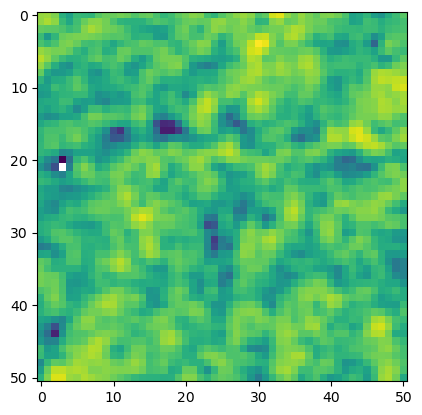

In [55]:
for v in land_patches[:10]:
    plt.imshow(
        10 * np.log10(
            (v - v.min()) / (v.max() - v.min())
         )
    )
    plt.show()

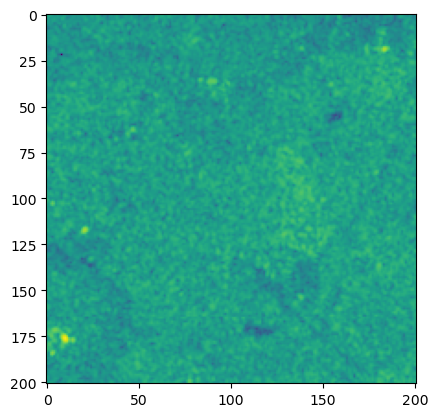

In [103]:
v = 10 * np.log10(land_patches[0] - (land_patches[0].min() * 1.1))
plt.imshow(img_as_ubyte((v - v.min()) / (v.max() - v.min())))

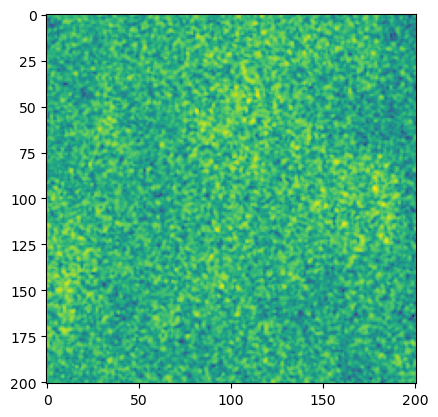

In [98]:
v = 10 * np.log10(noland_patches[0] - (noland_patches[0].min() * 2))
plt.imshow(img_as_ubyte((v - v.min()) / (v.max() - v.min())))

In [20]:
graycoprops(glcm, 'homogeneity')[0, 0]

0.047521617731497386

In [22]:
land_hom_no_dB = []
for i, patch in enumerate(land_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    v = patch#10 * np.log10(patch)
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    land_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])

In [21]:
noland_hom_no_dB = []
for i, patch in enumerate(noland_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    #v = 10 * np.log10(patch)
    v = patch
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    noland_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])

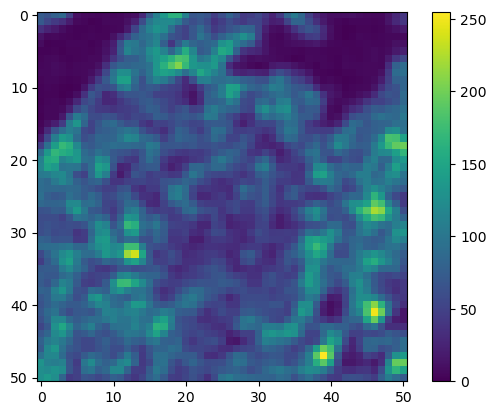

In [28]:
plt.imshow(ubyte)
plt.colorbar()

In [24]:
noland_hom_no_dB

[]

In [5]:
land_dir = './out/homogenuity/land/'
faulty_ds = []

for file_name in os.listdir(land_dir):
    if not file_name.endswith('.nc'): continue 
            
    land_ds = xr.open_dataset(land_dir + file_name)
    if np.isnan(land_ds.sigma0).any():
        faulty_ds.append(land_ds)

[<xarray.Dataset>
 Dimensions:    (line: 201, sample: 201, pol: 2)
 Coordinates:
   * line       (line) int64 15112 15113 15114 15115 ... 15309 15310 15311 15312
   * sample     (sample) int64 588 589 590 591 592 593 ... 784 785 786 787 788
   * pol        (pol) object 'VV' 'VH'
 Data variables:
     land_mask  (line, sample) int8 ...
     latitude   (line, sample) float64 ...
     longitude  (line, sample) float64 ...
     sigma0     (pol, line, sample) float64 nan nan nan ... 0.02399 0.01861,
 <xarray.Dataset>
 Dimensions:    (line: 201, sample: 201, pol: 2)
 Coordinates:
   * line       (line) int64 11652 11653 11654 11655 ... 11849 11850 11851 11852
   * sample     (sample) int64 583 584 585 586 587 588 ... 779 780 781 782 783
   * pol        (pol) object 'VV' 'VH'
 Data variables:
     land_mask  (line, sample) int8 ...
     latitude   (line, sample) float64 ...
     longitude  (line, sample) float64 ...
     sigma0     (pol, line, sample) float64 nan nan nan ... 0.04736 0.05829,


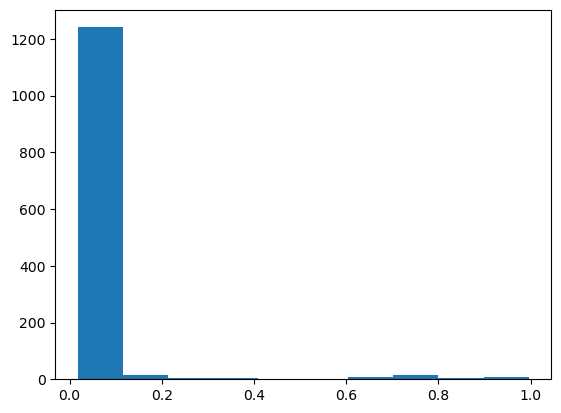

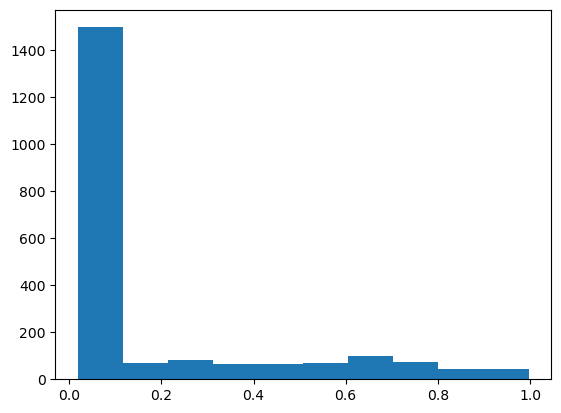

In [26]:
plt.hist(list(filter(lambda x: x !=1, noland_hom)))
plt.show()

plt.hist(list(filter(lambda x: x !=1, land_hom)))
plt.show()

In [16]:
land_hom_no_dB = defaultdict(list)
for i, patch in enumerate(land_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    v = 10 * np.log10(patch)
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    land_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])
    
noland_hom_no_dB = defaultdict(list)
for i, patch in enumerate(noland_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    v = 10 * np.log10(patch)
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    noland_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])

5

In [117]:
def extract_glcm(dir):
    out_dict = defaultdict(list)
    
    for file_name in os.listdir(dir)[:10]:
        if not file_name.endswith('.nc'): continue

        xr_ds = xr.open_dataset(dir + file_name)
        for sigma0 in xr_ds.sigma0.transpose("pol", ...):   
            v = sigma0.values 
            ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
            glcm = graycomatrix(ubyte, distances=[10], angles=[0,np.pi/2], levels=256,
                                symmetric=True, normed=True)
            
            out_dict['hom'].append(graycoprops(glcm, 'homogeneity'))#
            out_dict['dis'].append(graycoprops(glcm, 'dissimilarity'))#[0, 0])
            out_dict['cor'].append(graycoprops(glcm, 'correlation'))#[0, 0])
    return out_dict

In [118]:
extract_glcm(noland_dir)

defaultdict(list,
            {'hom': [array([[0.04538446, 0.04392832]]),
              array([[0.06812542, 0.06978291]]),
              array([[0.0390339 , 0.03770641]]),
              array([[0.04825564, 0.04844562]]),
              array([[0.03816061, 0.03901041]]),
              array([[0.05161736, 0.05395765]]),
              array([[0.03666453, 0.03766404]]),
              array([[0.04789884, 0.05215793]]),
              array([[0.0337012 , 0.03343192]]),
              array([[0.09960868, 0.09843998]]),
              array([[0.04304699, 0.04269121]]),
              array([[0.06402258, 0.06072956]]),
              array([[0.04268215, 0.04291244]]),
              array([[0.04404058, 0.04329197]]),
              array([[0.72630977, 0.73009943]]),
              array([[0.74573251, 0.75155663]]),
              array([[0.03377741, 0.03438502]]),
              array([[0.06129146, 0.063514  ]]),
              array([[0.03974482, 0.03932739]]),
              array([[0.05355812, 0.05545801

In [10]:
noland_dir = './out/homogenuity/noland/'
noland_dict = extract_glcm(noland_dir)
noland_dict

defaultdict(list,
            {'hom': [0.04660060637465003,
              0.07209957324012978,
              0.038186063408521334,
              0.04828653120933188,
              0.037845803404390435,
              0.05407775134791186,
              0.03862646272491518,
              0.05145593982370688,
              0.033647809109763074,
              0.09904277113518514,
              0.042642635328424806,
              0.06322439307726992,
              0.04247627977173798,
              0.04410663321474959,
              0.7293393807507749,
              0.7442671741734689,
              0.034212397330918985,
              0.06146226941839492,
              0.04091932453629015,
              0.05758665413976736,
              0.03597914984939682,
              0.040660887995339755,
              0.039605868607786684,
              0.04544103111665178,
              0.04772306532987808,
              0.056652479087847214,
              0.05394459605113048,
              0.04230612

In [11]:
mixed_dirs = ['./out/glcm_testset/mixed/' + t for t in ['ice/', 'land_and_sea/', 'wind_farm/']]
ice_dict, mixed_dict, wf_dict = [extract_glcm(mdir) for mdir in mixed_dirs]
ice_dict, mixed_dict, wf_dict

(defaultdict(list,
             {'hom': [0.05700937270170315,
               0.046560876554791825,
               0.047598628524136634,
               0.07683399157197313,
               0.04896198399066914,
               0.040966111982720335,
               0.04560134425980625,
               0.0759382813816481,
               0.04406114730469432,
               0.06474823956430673,
               0.04907598523056318,
               0.04488316993573902,
               0.05145495404688633,
               0.04609069098880988,
               0.04941045189640008,
               0.043587857840308566,
               0.05145495404688633,
               0.04609069098880988,
               0.04734622790639323,
               0.079799824144781,
               0.05661065230507543,
               0.04660356664331789,
               0.044103481439152076,
               0.06162682240982913,
               0.04293318311341843,
               0.07333623220735816,
               0.054020730707786783,

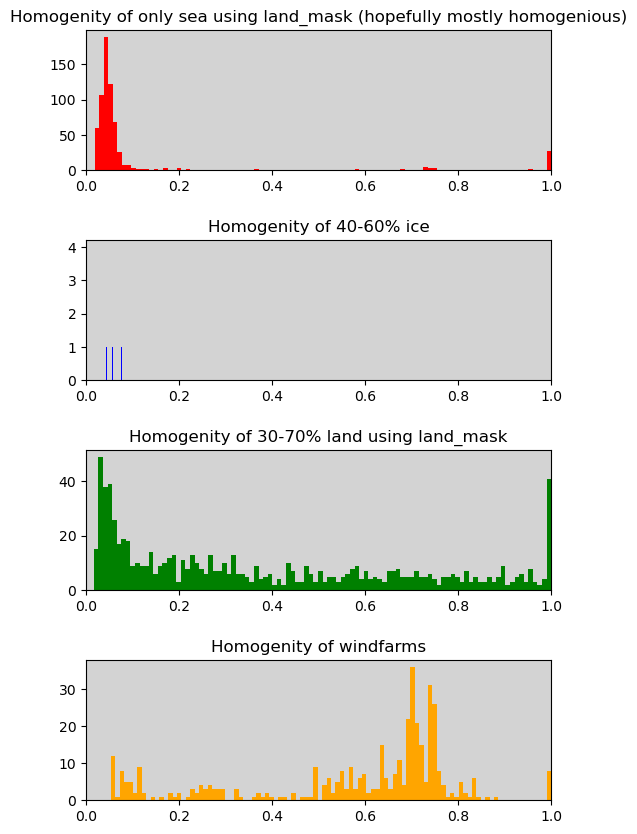

In [107]:
data = [noland_dict, ice_dict, mixed_dict, wf_dict]

# Create a figure with four subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 10))

# Set the x-axis limits for all histograms
xlim = (0, 1)

# Set the colors for each histogram
colors = ['red', 'blue', 'green', 'orange']
titles = [
    'Homogenity of only sea using land_mask (hopefully mostly homogenious)',
    'Homogenity of 40-60% ice',
    'Homogenity of 30-70% land using land_mask',
    'Homogenity of windfarms'
]


# Plot the histograms in each subplot with custom color and x-axis limits
for i, ax in enumerate(axs):
    ax.hist(data[i]['hom'], bins=100, color=colors[i])
    ax.set_title(titles[i])
    ax.set_facecolor('lightgray')
    ax.set_xlim(xlim)
    
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

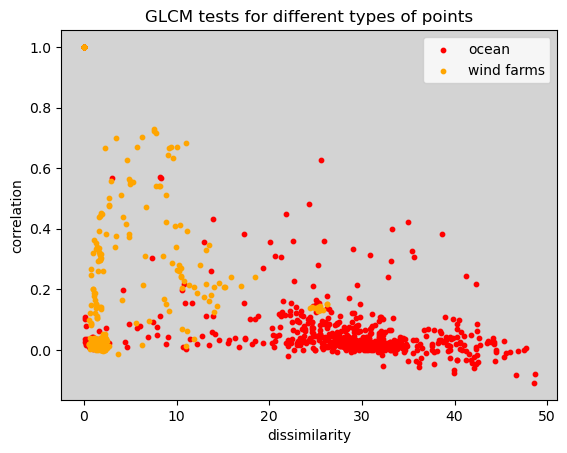

In [119]:
# Define the four lists of coordinates

# Create a new figure
fig, ax = plt.subplots()

# Plot each list of coordinates with a different color
ax.scatter(noland_dict['dis'], noland_dict['cor'], color='red', label='ocean', s=10)
#ax.scatter(ice_dict['dis'], ice_dict['cor'], color='blue', label='ice mix', s=10)
#ax.scatter(mixed_dict['dis'], mixed_dict['cor'], color='green', label='land mix', s=10)
ax.scatter(wf_dict['dis'], wf_dict['cor'], color='orange', label='wind farms', s=10)

# Add a legend for the different lists
ax.legend()

# Add axis labels and a title
ax.set_xlabel('dissimilarity')
ax.set_ylabel('correlation')
ax.set_title('GLCM tests for different types of points')
ax.set_facecolor('lightgray')

# Show the plot
plt.show()

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [66]:
noland_X = np.column_stack((noland_dict['hom'], noland_dict['dis'], noland_dict['cor']))
#filter incorrect values
noland_X = noland_X[noland_X[:, 0] != 1]

wf_X = np.column_stack((wf_dict['hom'], wf_dict['dis'], wf_dict['cor']))
#filter incorrect values
wf_X = wf_X[wf_X[:, 0] != 1]

X, y = (np.concatenate((noland_X, wf_X)),
        np.concatenate((np.zeros_like(noland_X[:, 0]), np.ones_like(wf_X[:, 0]))))
X, y

(array([[4.66006064e-02, 2.49956848e+01, 1.35340014e-01],
        [7.20995732e-02, 2.97722611e+01, 3.24851149e-02],
        [3.81860634e-02, 2.86975074e+01, 2.47236532e-02],
        ...,
        [6.92384271e-01, 1.51327546e+00, 2.05807795e-02],
        [4.91669333e-01, 2.73347548e+00, 4.79319908e-01],
        [2.67924953e-01, 9.17537313e+00, 6.66289304e-01]]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
svc = SVC()
svc = svc.fit(X_train, y_train)

In [70]:
svc.score(X_test, y_test)

0.9337175792507204

In [89]:
len(list(fn for fn in os.listdir('./out/homogenuity/noland/') if fn.endswith('.nc')))

338

In [ ]:
5

/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/

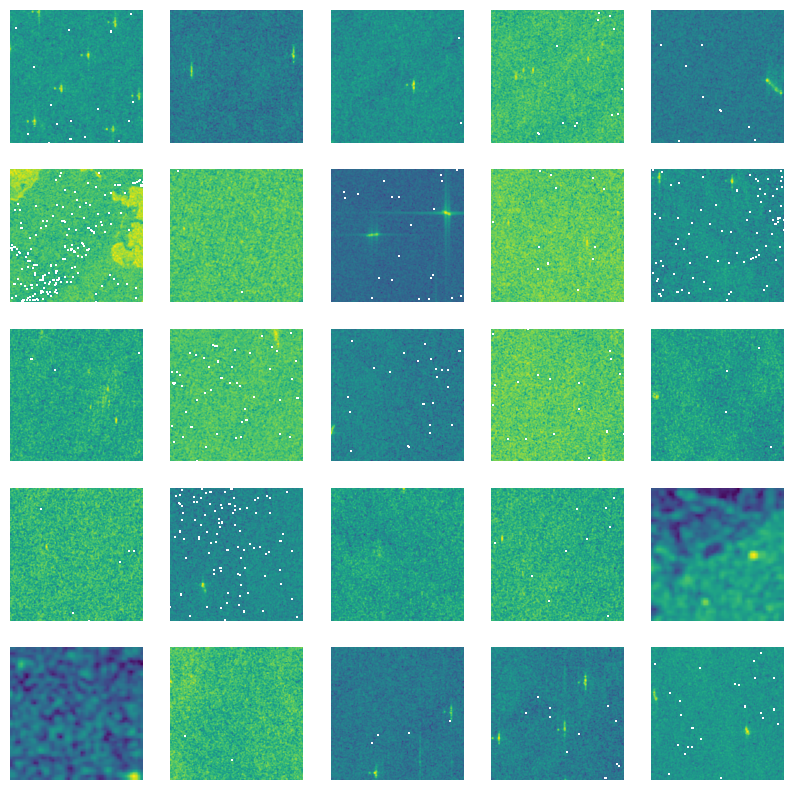

In [106]:
def miss_gen():
    x = np.column_stack((noland_dict['hom'], noland_dict['dis'], noland_dict['cor']))
    #filter incorrect values
    #noland_X = noland_X[noland_X[:, 0] != 1]
    
    preds = iter(svc.predict(x))
    preds_and_file_name = zip(
        preds, preds,
        (fn for fn in os.listdir('./out/homogenuity/noland/') if fn.endswith('.nc'))
    )
    for i, (p, p2, fn) in enumerate(preds_and_file_name):
        if p == 1 and x[i*2,0] != 1:
            xr_ds = xr.open_dataset(f'./out/homogenuity/noland/{fn}')
            yield np.log10(xr_ds.isel(pol=0).sigma0)
        #if p2 == 1 and x[i*2,0] != 1:
        #    xr_ds = xr.open_dataset(f'./out/homogenuity/noland/{fn}')
        #    yield (xr_ds.isel(pol=1).sigma0)
        
missclassified = list(miss_gen())      
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

# Loop through the subplots and plot each image
for i, ax in enumerate(axes.flat):
    # Get the next image from the batch
    image = missclassified[i]
    
    # Plot the image on the current subplot
    ax.imshow(image)
    
    # Turn off the axis labels and ticks
    ax.set_axis_off()

# Show the plot
plt.show()

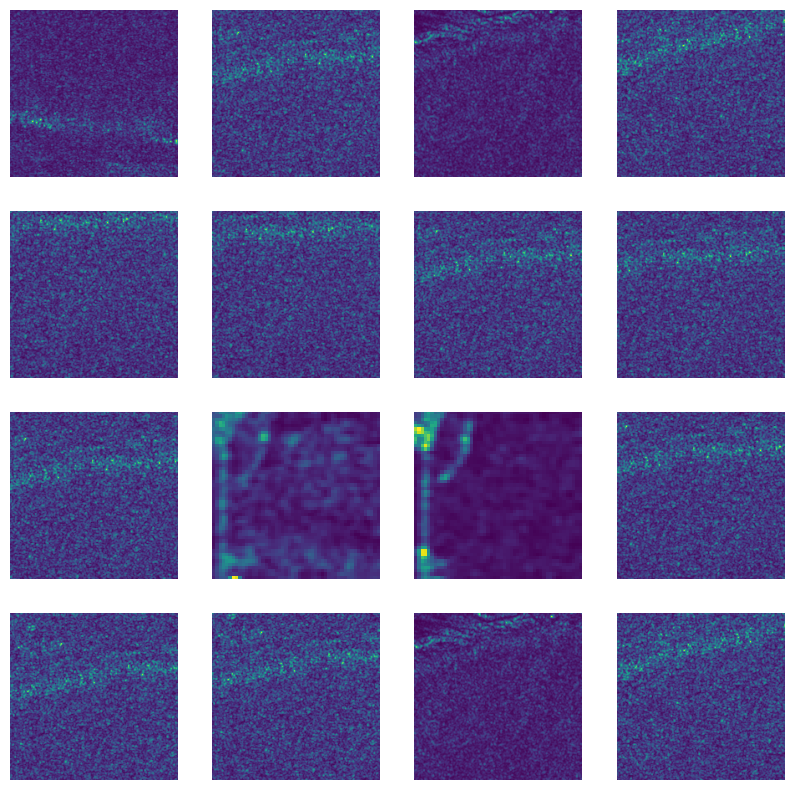

In [101]:
def miss_gen():
    x = np.column_stack((wf_dict['hom'], wf_dict['dis'], wf_dict['cor']))
    #filter incorrect values
    #noland_X = noland_X[noland_X[:, 0] != 1]
    
    preds = iter(svc.predict(x))
    preds_and_file_name = zip(
        preds, preds,
        (fn for fn in os.listdir('./out/glcm_testset/mixed/wind_farm/') if fn.endswith('.nc'))
    )
    for i, (p, p2, fn) in enumerate(preds_and_file_name):
        if p == 0 and x[i*2,0] != 1:
            xr_ds = xr.open_dataset(f'./out/glcm_testset/mixed/wind_farm/{fn}')
            yield (xr_ds.isel(pol=0).sigma0)
        if p2 == 0 and x[i*2,0] != 1:
            xr_ds = xr.open_dataset(f'./out/glcm_testset/mixed/wind_farm/{fn}')
            yield (xr_ds.isel(pol=1).sigma0)
        
missclassified = list(miss_gen())      
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

# Loop through the subplots and plot each image
for i, ax in enumerate(axes.flat):
    # Get the next image from the batch
    image = missclassified[i]
    
    # Plot the image on the current subplot
    ax.imshow(image)
    
    # Turn off the axis labels and ticks
    ax.set_axis_off()

# Show the plot
plt.show()